# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}

# small list of cities to test
cities = ["sydney","nairobi","severo-kurilsk","nvl_test","darhan","hillsborough","atlanta","cairo"]

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "appid": weather_api_key,
    "units": "imperial"
}

city_counter = 1
set_counter = 1
set_size = 50
found_city_id = 0

weather_columns=["City_ID" ,"City", "Cloudiness", "Country" ,"Date", "Humidity", "Lat" ,"Lng", "Max Temp","Wind Speed"]
weather_rows = []

print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    params['q'] = city
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    response = requests.get(base_url, params=params).json()
    
    try:
        weather_row = [found_city_id, city, response["clouds"]["all"], response["sys"]["country"], response["dt"], response["main"]["humidity"], response["coord"]["lat"], response["coord"]["lon"], response["main"]["temp_max"], response["wind"]["speed"]]
        weather_rows.append(weather_row)
        found_city_id += 1
    except KeyError:
        print("City not found. Skipping...")

    city_counter += 1
    if city_counter > set_size:
        city_counter = 1
        set_counter += 1

weather_df = pd.DataFrame(weather_rows, columns=weather_columns)


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | sydney
Processing Record 2 of Set 1 | nairobi
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | nvl_test
City not found. Skipping...
Processing Record 5 of Set 1 | darhan
Processing Record 6 of Set 1 | hillsborough
Processing Record 7 of Set 1 | atlanta
Processing Record 8 of Set 1 | cairo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [147]:
# Comment for testing
#weather_df.to_csv(output_data_file, index=False, header=True)

#weather_df.drop(columns="City_ID",inplace=True)
#weather_df

# For Testing
weather_df = pd.read_csv(output_data_file)
weather_df.drop(columns="City_ID",inplace=True)

# Get the maximum date value from the weather data and convert to mm/dd/yy format
run_date = time.strftime("%D", time.localtime(int(weather_df["Date"].max())))


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

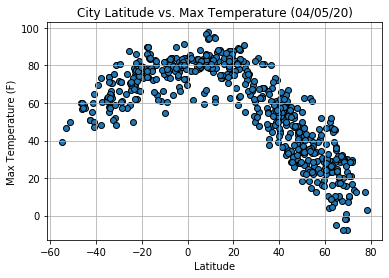

In [156]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({run_date})")
plt.savefig("../output_data/LatvTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

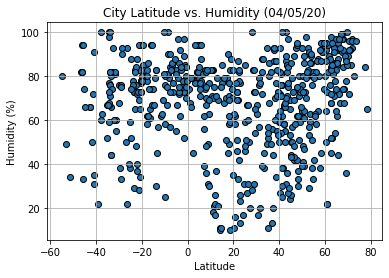

In [157]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({run_date})")
plt.savefig("../output_data/LatvHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

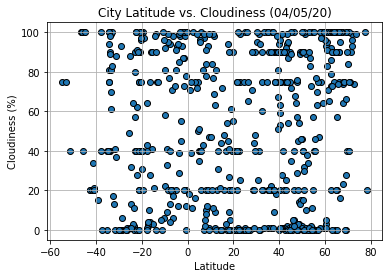

In [158]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({run_date})")
plt.savefig("../output_data/LatvCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

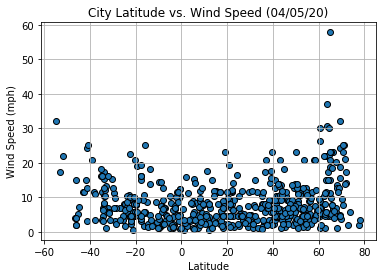

In [159]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({run_date})")
plt.savefig("../output_data/LatvWind.png")
plt.show()

## Linear Regression

In [264]:
# OPTIONAL: Create a function to create Linear Regression plots
def get_regression_data(x_values, y_values,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    if (slope < -0.5) | ((slope < 0) & (y_values.mean() < y_values.median())):
        # Put the equation in lower left corner
        annotate_xy = (x_values.min(),y_values.min()+3)
    elif (slope > 0.5) | ((slope > 0) & (y_values.median() < y_values.mean())):
        # Put the equation in upper left corner
        annotate_xy = (x_values.min(),y_values.max()-3)
    elif (slope < 0) & (y_values.median() < y_values.mean()):
        # Put the equation in upper right corner
        annotate_xy = (x_values.max() - .4*(x_values.max() - x_values.min()),y_values.max()-3)
    else:
        # Put the equation in lower right corner
        annotate_xy = (x_values.max() - .4*(x_values.max() - x_values.min()),y_values.min()+3)
        
    print(f"r-squared: {rvalue**2}")
    plt.scatter(x_values,y_values,edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title} ({run_date})")
    plt.show()


In [265]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.7970940344399648


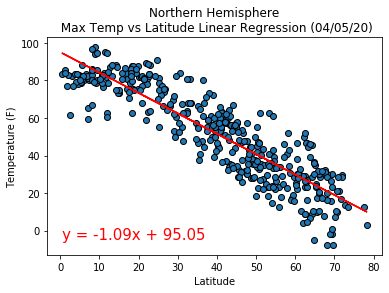

In [266]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"],"Latitude","Temperature (F)","Northern Hemisphere\n Max Temp vs Latitude Linear Regression")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.4861188355180551


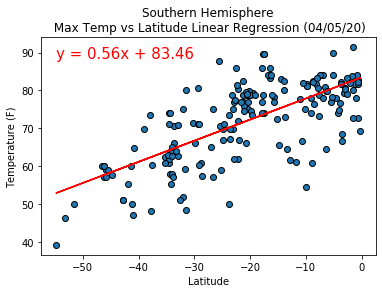

In [267]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"],"Latitude","Temperature (F)","Southern Hemisphere\n Max Temp vs Latitude Linear Regression")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.07243425868314317


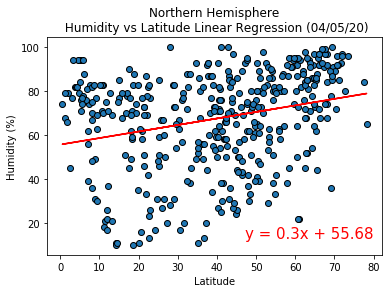

In [268]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"],"Latitude","Humidity (%)","Northern Hemisphere\n Humidity vs Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.04754303234111387


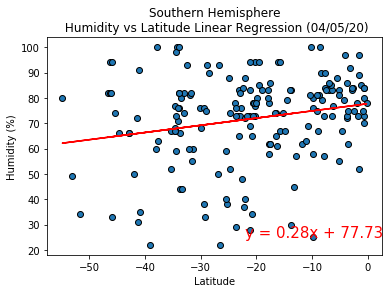

In [269]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"],"Latitude","Humidity (%)","Southern Hemisphere\n Humidity vs Latitude Linear Regression")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.052034267493213396


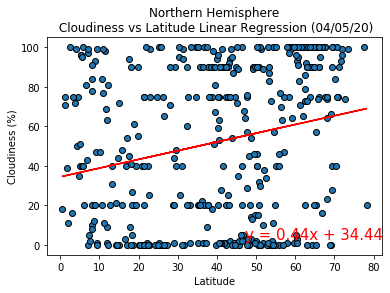

In [270]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"],"Latitude","Cloudiness (%)","Northern Hemisphere\n Cloudiness vs Latitude Linear Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.0005011821682231417


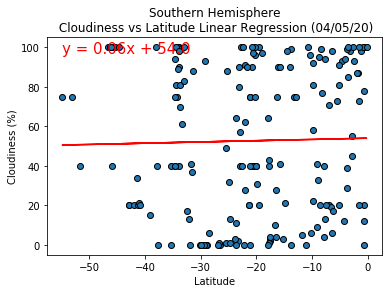

In [271]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"],"Latitude","Cloudiness (%)","Southern Hemisphere\n Cloudiness vs Latitude Linear Regression")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.09002524425653567


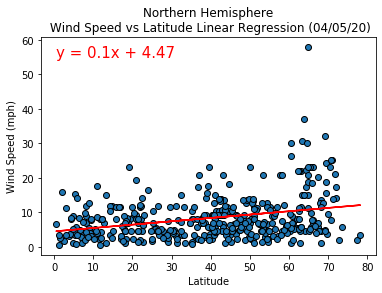

In [272]:
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"],"Latitude","Wind Speed (mph)","Northern Hemisphere\n Wind Speed vs Latitude Linear Regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.11619542288737572


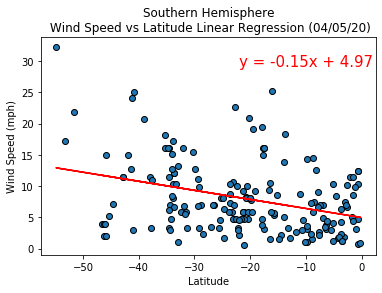

In [273]:
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"],"Latitude","Wind Speed (mph)","Southern Hemisphere\n Wind Speed vs Latitude Linear Regression")